<a href="https://colab.research.google.com/github/benwalkerdata/Portfolio-SVM-R/blob/main/SVM_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Support Vector Machines Project</h1>
For this project I will be exploring publicly available data from Lendingclub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully as an investor, you would want to invest in people who showed a profile of having high probability of paying you back. I will try to create a model that will help predict this.

I will be using lending data from 2007-2010 and be trying to classify and predict whether or not the borrow paid back their loan in full.

In [15]:
install.packages("caTools")
install.packages("e1071")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




<h2>Data</h2>
I'll load the dataset into a dataframe called loans

In [1]:
loans <- read.csv('/content/loan_data.csv')

In [2]:
#Structure of the dataset
str(loans)

'data.frame':	9578 obs. of  14 variables:
 $ credit.policy    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ purpose          : chr  "debt_consolidation" "credit_card" "debt_consolidation" "debt_consolidation" ...
 $ int.rate         : num  0.119 0.107 0.136 0.101 0.143 ...
 $ installment      : num  829 228 367 162 103 ...
 $ log.annual.inc   : num  11.4 11.1 10.4 11.4 11.3 ...
 $ dti              : num  19.5 14.3 11.6 8.1 15 ...
 $ fico             : int  737 707 682 712 667 727 667 722 682 707 ...
 $ days.with.cr.line: num  5640 2760 4710 2700 4066 ...
 $ revol.bal        : int  28854 33623 3511 33667 4740 50807 3839 24220 69909 5630 ...
 $ revol.util       : num  52.1 76.7 25.6 73.2 39.5 51 76.8 68.6 51.1 23 ...
 $ inq.last.6mths   : int  0 0 1 1 0 0 0 0 1 1 ...
 $ delinq.2yrs      : int  0 0 0 0 1 0 0 0 0 0 ...
 $ pub.rec          : int  0 0 0 0 0 0 1 0 0 0 ...
 $ not.fully.paid   : int  0 0 0 0 0 0 1 1 0 0 ...


In [3]:
#Summary of the dataset
summary(loans)

 credit.policy     purpose             int.rate       installment    
 Min.   :0.000   Length:9578        Min.   :0.0600   Min.   : 15.67  
 1st Qu.:1.000   Class :character   1st Qu.:0.1039   1st Qu.:163.77  
 Median :1.000   Mode  :character   Median :0.1221   Median :268.95  
 Mean   :0.805                      Mean   :0.1226   Mean   :319.09  
 3rd Qu.:1.000                      3rd Qu.:0.1407   3rd Qu.:432.76  
 Max.   :1.000                      Max.   :0.2164   Max.   :940.14  
 log.annual.inc        dti              fico       days.with.cr.line
 Min.   : 7.548   Min.   : 0.000   Min.   :612.0   Min.   :  179    
 1st Qu.:10.558   1st Qu.: 7.213   1st Qu.:682.0   1st Qu.: 2820    
 Median :10.929   Median :12.665   Median :707.0   Median : 4140    
 Mean   :10.932   Mean   :12.607   Mean   :710.8   Mean   : 4561    
 3rd Qu.:11.291   3rd Qu.:17.950   3rd Qu.:737.0   3rd Qu.: 5730    
 Max.   :14.528   Max.   :29.960   Max.   :827.0   Max.   :17640    
   revol.bal         revol.

The following columns need to be converted to factors

In [4]:
loans$credit.policy <- factor(loans$credit.policy)
loans$inq.last.6mths <- factor(loans$inq.last.6mths)
loans$delinq.2yrs <- factor(loans$delinq.2yrs)
loans$pub.rec <- factor(loans$pub.rec)
loans$not.fully.paid <- factor(loans$not.fully.paid)

<h2>Explore the Data</h2>
I'll hse ggplot2 to visualise the data.

In [5]:
library(ggplot2)

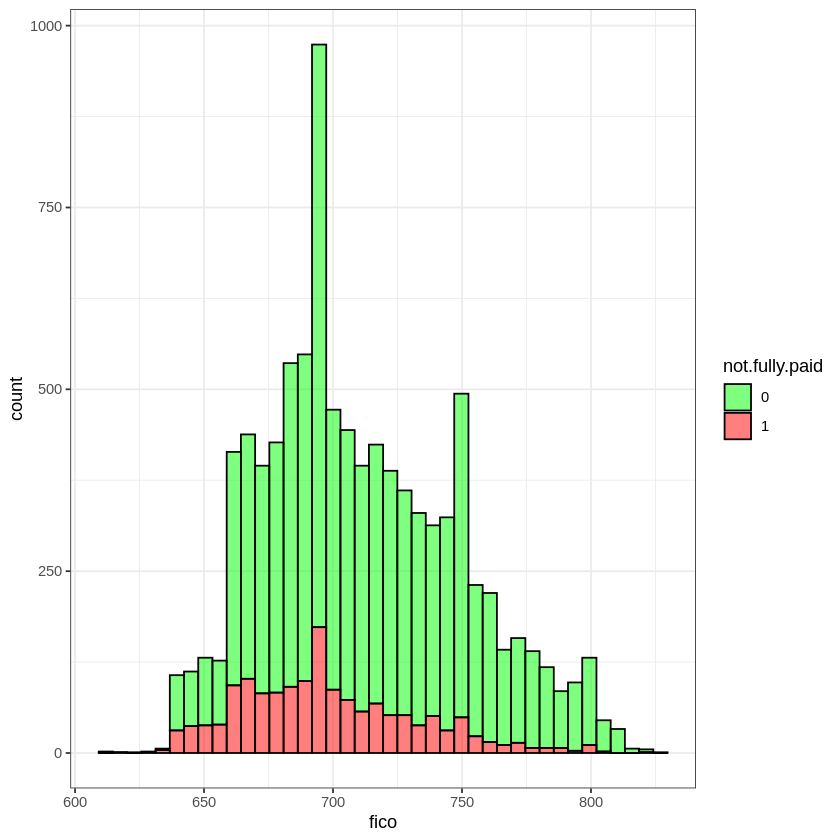

In [6]:
#Histogram of fico scores coloured by not.fully.paid
pl <- ggplot(loans,aes(x=fico))
pl <- pl + geom_histogram(aes(fill=not.fully.paid),color='black',bins=40,alpha=0.5)
pl + scale_fill_manual(values = c('green', 'red')) + theme_bw()

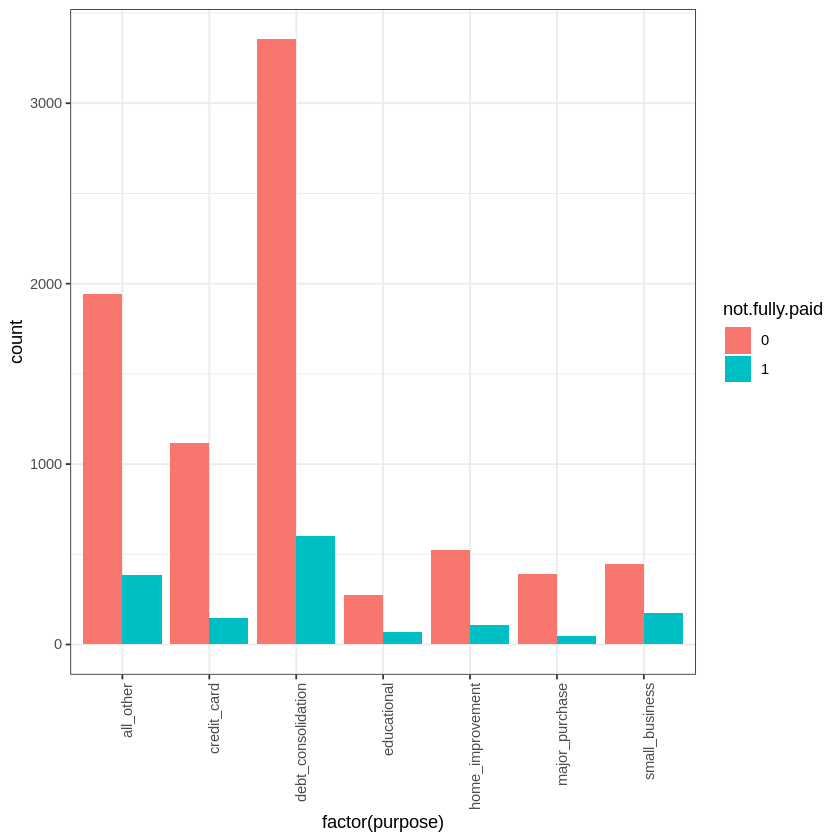

In [7]:
#Barplot of purpose counts, colour by not.fully.paid
pl <- ggplot(loans,aes(x=factor(purpose)))
pl <- pl + geom_bar(aes(fill=not.fully.paid),position="dodge")
pl + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1))

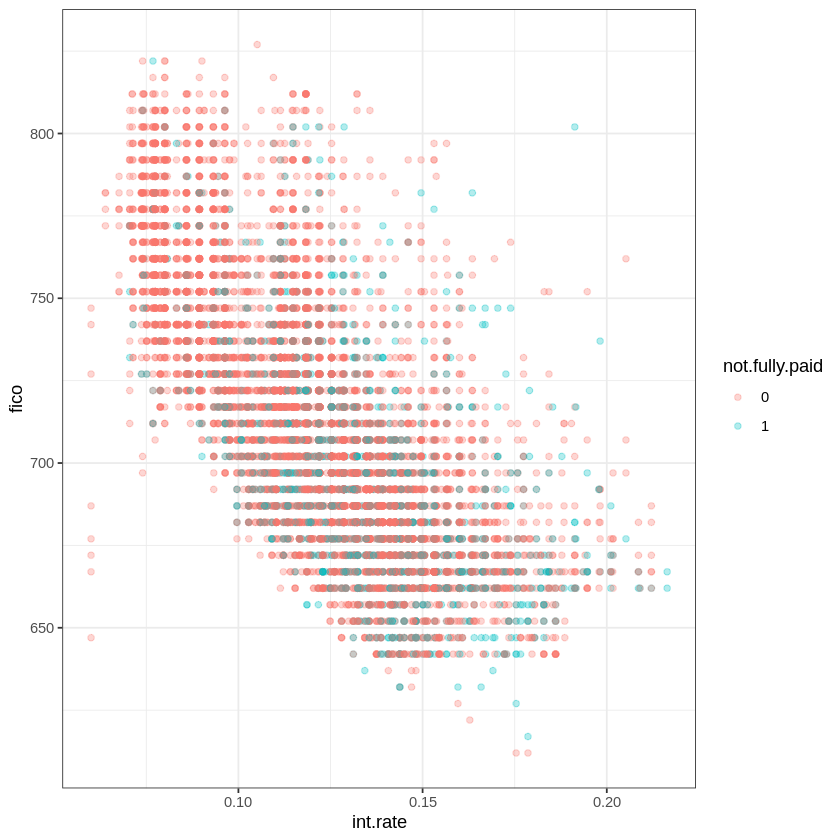

In [9]:
#Scatterplot of fico scores vs int.rate
ggplot(loans,aes(int.rate,fico)) +geom_point(aes(color=not.fully.paid),alpha=0.3) + theme_bw()

<h2>Build the model </h2>

In [13]:
#Split the data into training and testing sets

library(caTools)

set.seed(101)

spl = sample.split(loans$not.fully.paid, 0.7)
train = subset(loans, spl == TRUE)
test = subset(loans, spl == FALSE)

In [16]:
library(e1071)

In [17]:
model <- svm(not.fully.paid ~ .,data=train)

In [18]:
summary(model)


Call:
svm(formula = not.fully.paid ~ ., data = train)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  2849

 ( 1776 1073 )


Number of Classes:  2 

Levels: 
 0 1




In [22]:
#Predict values from the test dataset
predicted.values <- predict(model,test[1:13])

In [21]:
#Create confusion matrix
table(predicted.values,test$not.fully.paid)

                
predicted.values    0    1
               0 2413  460
               1    0    0

<h2>Tuning the model</h2>
We can see from the confusion matrix that the model didn't do well as it classified everything into one group.

In [23]:
tune.results <- tune(svm,train.x=not.fully.paid~., data=train,kernel='radial',
                  ranges=list(cost=c(1,10), gamma=c(0.1,1)))

In [24]:
model <- svm(not.fully.paid ~.,data=train,cost=10,gamma = 0.1 )
predicted.values <- predict(model,test[1:13])
table(predicted.values,test$not.fully.paid)

                
predicted.values    0    1
               0 2350  425
               1   63   35